# <center> CS559: Homework #2 </center>
###  <center> Due:10/8/2021 Friday 11:59 PM</center>

- Change the file name as YourName_F21_CS559_HW2
- Submit the assignment in `ipynb` and `html` formats. 
    - You can export the notebook in HTML. 
    - Do not compress your files. Please submit files individually. 
- All work must be your own and must not be shared with other classmates. 
    - Collaboration with classmates or getting help by any people is not acceptable. 
    - For impletementation problems, do not copy algorithms from internet. 

I pledge my honor that I have abided by the Stevens Honor System. - Jon Cucci

### Problem 1 - Linear Regression [35 pts]

1-a. Consider a data set in which each data point $t_n$ is associated with a weighting factor $r_n>0$, so that the sum of squares error function becomes 

$${\large E_D(\vec{w})=\frac{1}{2}\sum_{n=1}^Nr_n\big(t_n-\vec{w}^T\vec{x}_n\big)^2}$$

Find an expression for the solution $w^*$ that minimizes this error function. [5 pts]

After setting the gradient to zero, we get this equation for $w^*$
$${\large w^* = \big(\sum_{n=1}^Nr_n\vec{x}_n^T\vec{x}_n\big)^{-1}\big(\sum_{n=1}^Nr_nt_n\vec{x}_n\big)}$$

1-b. Implement a function called, `my_error(data,r_n)`, that estimates the error using the error function, $E_D(\vec{w})$, from 1-a. The task to implement a function to estimates the optimized $vec{w}$ and demonstrates the behavior of error at different weighting factor, $r_n$, values. The function return a list of $\vec{w}$, $r_n$, and error. Do not use any other modules except `numpy`. [10 pts]

In [1]:
### my_LR starts here
def my_LR(data,r_n):
    for r in r_n:
        w = 
        error = 
    
    return w, error, r_n

SyntaxError: invalid syntax (<ipython-input-1-ebc686a1770c>, line 4)

1-c. Load the dataset, make a model using Linear Regression from sklearn.linear_model to predict the target `y` from a given dataset `HW2_LR.csv`. Students must do EDA and pre-processing the dataset before training the model. All pre-processing and EDA work must be explained and the weights and mean squared error value must be reported. Treat the whole dataset as a train set. [15 pts]

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('./HW2_LR.csv')
data_norm = MinMaxScaler()
data_norm = pd.DataFrame(data_norm.fit_transform(data), columns= data.columns)

# *Beginning of EDA*

In [4]:
### EDA stars here
data.describe(include='all')

,a,b,c,d,k,y
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,150.445884,98.084535,5394.432218,-0.779184,0.788158,-3.716766e+05
std,86.830028,346.622332,2652.750144,0.617875,0.627936,1.842971e+06
min,1.010000,-499.850000,800.690000,-3.863405,-0.489047,-6.532252e+06
25%,74.447500,-204.830000,3119.750000,-1.142718,0.313955,-1.404627e+06
50%,151.250000,98.705000,5394.045000,-0.685267,0.678321,-7.736748e+04
75%,225.652500,399.640000,7714.985000,-0.306234,1.168409,8.068422e+05
max,299.960000,699.940000,9999.390000,0.648288,3.618800,3.523715e+06


In [5]:
# Checking for null data, none is found
data.isnull().sum()

a    0
b    0
c    0
d    0
k    0
y    0
dtype: int64

## Normalized Data Boxplot

<AxesSubplot:>

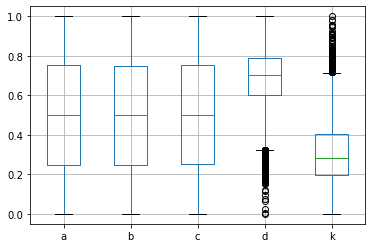

In [6]:
data_norm.drop('y', axis = 1).boxplot()

## Distribution Plots of Independent Variables

<AxesSubplot:xlabel='a', ylabel='Density'>

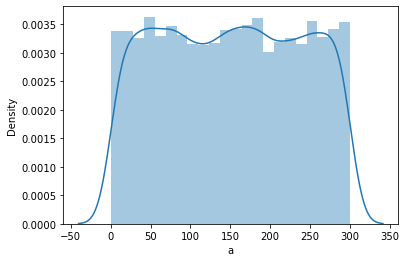

In [7]:
sns.distplot(data['a'])

<AxesSubplot:xlabel='b', ylabel='Density'>

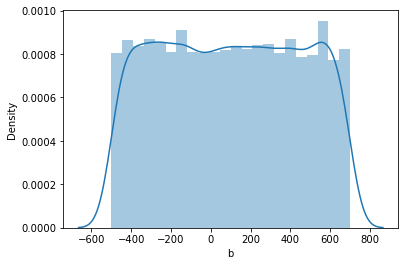

In [8]:
sns.distplot(data['b'])

<AxesSubplot:xlabel='c', ylabel='Density'>

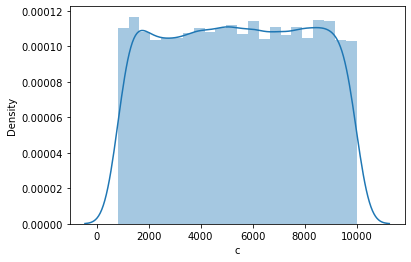

In [9]:
sns.distplot(data['c'])

<AxesSubplot:xlabel='d', ylabel='Density'>

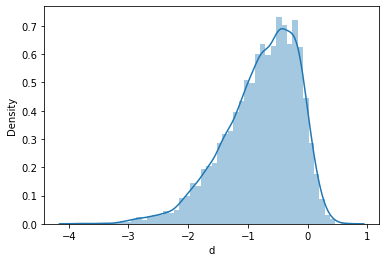

In [10]:
sns.distplot(data['d'])

<AxesSubplot:xlabel='k', ylabel='Density'>

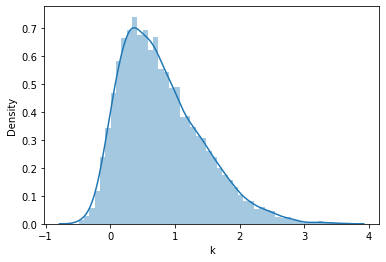

In [11]:
sns.distplot(data['k'])

## Heatmap for Correlation

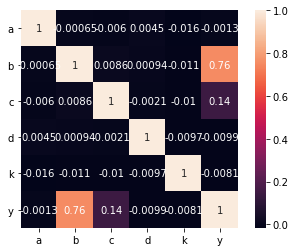

In [12]:
correlation = data.corr()
sns.heatmap(correlation, annot = True, square = True)
plt.yticks(rotation = 0)
plt.show()

correlation to y goes b > c > d > k > a

## High Correlation

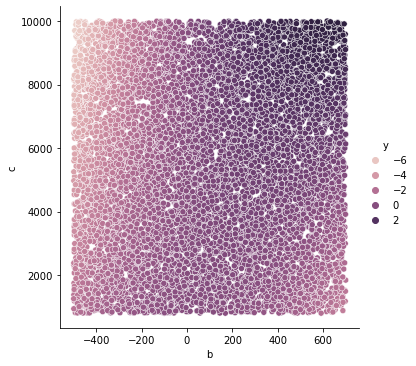

In [13]:
sns.relplot(x='b', y = 'c', hue = 'y', data=data)

From this, we can see that the higher b and c are, as well as how close they are to their maxes, determines how close y is to 2. This shows high correlation. B has the higher correlation and you can see thi as you go from left to right, it is obvious the general trend is the higher that b is, the higher that y is

## Low Correlation

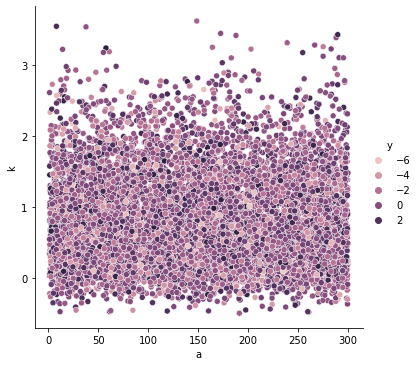

In [14]:
sns.relplot(x='a', y = 'k', hue = 'y', data=data)

a and k are the two variables with the lowest correlation to y. Random colors of y in every which direction show this

In [15]:
# Too many pixels for graphing
# data.groupby('y')[['a', 'b', 'c', 'd', 'k']].mean().T.plot(figsize=(12,8))

# *Beginning of Preprocessing*

1-c. Load the dataset, make a model using Linear Regression from sklearn.linear_model to predict the target `y` from a given dataset `HW2_LR.csv`. Students must do EDA and pre-processing the dataset before training the model. All pre-processing and EDA work must be explained and the weights and mean squared error value must be reported. Treat the whole dataset as a train set. [15 pts]

In [20]:
# No data is null, no need for replacements or dropping rows/columns
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [21]:
### Linear Regression Modeling starts here
LR = LinearRegression()
LR.fit(X, y)
y_pred = LR.predict(X).reshape((-1, 1))

r_sq = LR.score(X, y)
mse =  np.mean((y-y_pred)**2)
intercept = LR.intercept_
weights = LR.coef_

print("Mean Squared Error: " + str(mse))
print("Intercept: " + str(intercept))
print("Weights are: " + ', '.join(list(map(str, weights))))

Mean Squared Error: 5410694933217.579
Intercept: -1307239.9769464303
Weights are: 2.462200025736329, 4023.016243877791, 95.2434529801204, -30750.363987303237, 3619.490034899416


1-d. Use the function `my_error()` from 1-b to estimate $\vec{w}$ and make a visualization to show the behavior of error in terms of $r_n$. Add a point to indicate the final training model error obtained from 1-c. [5 pts]

In [22]:
### Visualization starts from here. 

### Problem 2 - Linear Classification 1 [65 pts]

In this assignment, you are going to implement three classifiers - **LDA, Perceptron, and Logistic Regression** - to predict the risk of heart attack using the provided dataset, `heart.csv`. 

Here are data attributes:
- Age : Age of the patient
- Sex : Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- output : 0= less chance of heart attack 1= more chance of heart attack

In [23]:
import numpy as np
from sklearn.metrics import accuracy_score
data = pd.read_csv('./heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


2-a. Implement `my_LDA` that classifies the target. Use `accuracy_score` from `sklearn.metrics` to calculate the accuracy. [10 pts]

In [91]:
### my_LDA starts here
class my_LDA:
    
    # Class Construction
    def __init__(self, n):
        self.n = n
        self.lin_dis = None
    
    # Training model function
    def fit(self, X, y):
        
        # Gathers units in the shape
        n1, n2 = X.shape
        
        # gathers label
        labels = np.unique(y)
        
        # Mean matrix
        ovr = np.mean(X, axis = 0)
        
        # Within and between class matrices
        w = np.zeros((n2, n2))
        b = np.zeros((n2, n2))
        
        for l in labels:
            c = X[y ==l]
            c_mean = np.mean(c,axis=0)
            w+= (c-c_mean).T.dot((c-c_mean))
            
            n_c = c.shape[0]
            mean_diff = (c_mean - ovr).reshape(n2, 1)
            b += n_c * (mean_diff).dot(mean_diff.T)
            
        A = np.linalg.inv(w).dot(b)
        e_val, e_vec = np.linalg.eig(A)
        e_vec = e_vec.T
        
        indexes = np.argsort(abs(e_val))[::-1]
        e_val, e_vec = e_val[indexes], e_vec[indexes]
        
        self.lin_dis = e_vec[0 : self.n]
    
    # transforms the data
    def predict(self, X):
        return np.dot(X, self.lin_dis.T)



2-b. Implement `my_Perceptron` that classifies the target. Use `accuracy_score` from `sklearn.metrics` to calculate the accuracy. [10 pts]

In [64]:
### my_Perceptron starts here
class my_Perceptron:

    # Class construction
    def __init__(self, learning_rate = 0.001, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights= None
        self.bias = None
        self.u_step = self.u_step
    
    # Unit Step Function
    def u_step(self, x):
        return np.where(x >= 0, 1, 0)
    
    # Trains a model
    def fit(self, X, y):
        n1, n2 = X.shape
        self.weights = np.zeros(n2)
        self.bias = 0
        y_true = np.array([1 if i > 0 else 0 for i in y])

        for i in range(self.n_iter):
            for index, x in enumerate(X):
                output = np.dot(x, self.weights) + self.bias
                y_pred = self.u_step(output)
                update = self.learning_rate * (y_true[index] - y_pred)
                
                self.weights += update*x
                self.bias += update
    
    # Prediction Function
    def predict(self, X):
        output = np.dot(X, self.weights) + self.bias
        y_pred = self.u_step(output)
        return y_pred

2-c. Implement `my_LogisticRegression` that classifies the target. Use `accuracy_score` from `sklearn.metrics` to calculate the accuracy. [10 pts]

In [100]:
### my_LogisticRegression starts here
class my_LogisticRegression:
    
    # Class Constructor
    def __init__(self, learning_rate = 0.001, n_iter = 1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
    
    # Usable Sigmoid Function
    def sig(self, x):
        return 1 / (1 + np.exp(-x))
    
    # Fits a model
    def fit(self, X, y):
        n1, n2 = X.shape
        self.weights = np.zeros(n2)
        self.bias = 0
        
        for i in range(self.n_iter):
            model = np.dot(X, self.weights) + self.bias
            y_pred = self.sig(model)
            
            # within and between scatter matrices
            w = (1/n1)*np.dot(X.T, (y_pred - y))
            b = (1/n1)*np.sum(y_pred-y)
            
            # updates weights and biases
            self.weights -= self.learning_rate * w
            self.bias -= self.learning_rate * b
            
    def predict(self, X):
        y_pred = self.sig(np.dot(X, self.weights) + self.bias)
        return np.array([1 if i >0.5 else 0 for i in y_pred])

2-d. The EDA and pre-processing are not limitted however, you must
1. check if the data is **balanced** or not. 
2. check if features are **skewed** or not.
3. check outliers. 

For any finds from 1 to 3, please handle the data carefully. Exaplin your workflow and perform accordingly. If any interesting facts are learned, please state them. [15 pts]

In [27]:
### EDA starts here
from sklearn.preprocessing import MinMaxScaler
data_norm = MinMaxScaler()
data_norm = pd.DataFrame(data_norm.fit_transform(data), columns= data.columns)

data.describe(include = 'all')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [28]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

No NULL values. Good.

## Checking for Balanced Data

0    138
1    165
Name: output, dtype: int64


<AxesSubplot:>

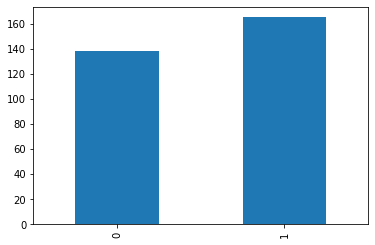

In [29]:
count = data['output'].value_counts(ascending=True)
print(count)
count.plot(kind='bar')

Data is outbalanced, with 0 having a count of 138 and 1 having a count of 165

## Checking for Skewed Data

In [30]:
data.skew(axis = 0)

age        -0.202463
sex        -0.791335
cp          0.484732
trtbps      0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalachh   -0.537410
exng        0.742532
oldpeak     1.269720
slp        -0.508316
caa         1.310422
thall      -0.476722
output     -0.179821
dtype: float64

There is a slight skewing, although not much

## Normalized Data Boxplot

<AxesSubplot:>

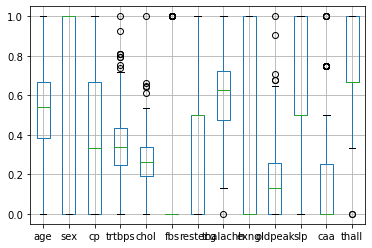

In [31]:
data_norm.drop('output', axis = 1).boxplot()

Boxplot graphing all the features on a normalized (0,1) scale. All dots being showed can be cast as outliers.

trtbps, chol, oldpeak and caa all have outliers.

## Heatmap for Correlation

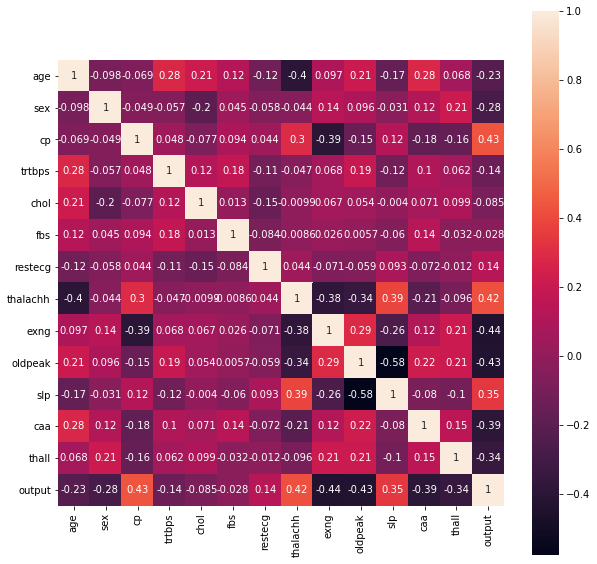

In [32]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr, annot=True, square=True, ax = ax)
plt.yticks(rotation = 0)
plt.show()

Seems like the top three correlations are exng, cp, and oldpeak. chol and fbs are the bottom three correlations.

## Highest Correlations

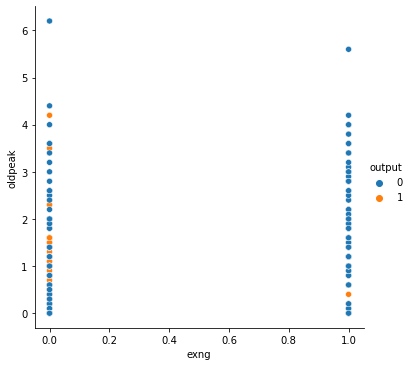

In [33]:
sns.relplot(x='exng', y = 'oldpeak', hue = 'output', data = data)

## Lowest Correlations

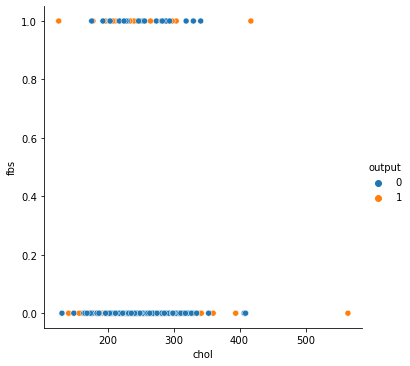

In [34]:
sns.relplot(x='chol', y = 'fbs', hue = 'output', data = data)

<AxesSubplot:>

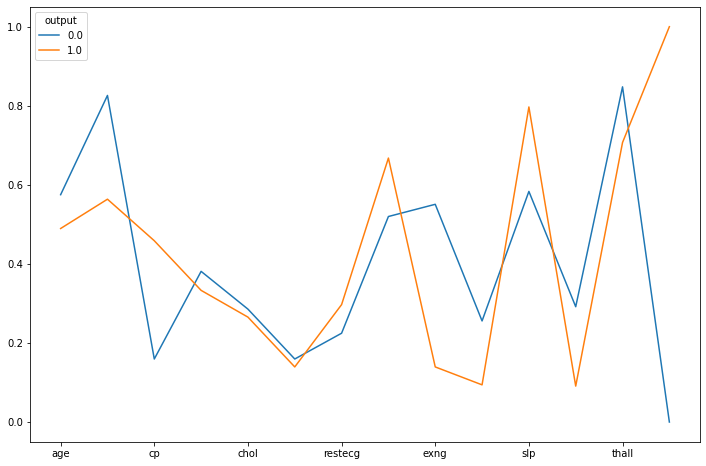

In [35]:
data_norm.groupby('output')[data_norm.columns].mean().T.plot(figsize=(12,8))

In [36]:
### Pre-processing starts here
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

2-e. Use ML LDA, Perceptron, and LogisticRegression from sklearn to classify the trained data and report the accuracy. [10 pts]

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron

In [38]:
### LDA starts here
clf1= LinearDiscriminantAnalysis()
clf1.fit(X, y)
y_pred = clf1.predict(X)
clf1_accuracy = accuracy_score(y,y_pred)
clf1_accuracy

0.8415841584158416

In [39]:
### Perceptron starts here
clf2 = Perceptron()
clf2.fit(X, y)
y_pred = clf2.predict(X)
clf2_accuracy = accuracy_score(y,y_pred)
clf2_accuracy

0.6567656765676567

In [40]:
### Logistic Regression starts here
clf3 = LogisticRegression()
clf3.fit(X, y)
y_pred = clf3.predict(X)
clf3_accuracy = accuracy_score(y,y_pred)
clf3_accuracy

0.8547854785478548

2-f. Use the implemented classifiers from 2-a to 2-c and classify the output. [10 pts] 

In [97]:
clf4= my_LDA(2)
clf4.fit(X, y)
y_pred = clf4.predict(X)
clf4_accuracy = accuracy_score(y,(y_pred >= 0.5).astype("int").ravel()[:303])
clf4_accuracy

0.46534653465346537

In [70]:
clf5= my_Perceptron(learning_rate = 1, n_iter=100)
clf5.fit(X, y)
y_pred = clf5.predict(X)
clf5_accuracy = accuracy_score(y,y_pred)
clf5_accuracy

0.45544554455445546

In [77]:
clf6= my_LogisticRegression()
clf6.fit(X, y)
y_pred = clf6.predict(X)
clf6_accuracy = accuracy_score(y,y_pred)
clf6_accuracy

0.6072607260726073

In [99]:
result_table = pd.DataFrame({'Model':['clf1','clf2','clf3','clf4','clf5','clf6'],
                             'Accuracy':[clf1_accuracy,clf2_accuracy,clf3_accuracy,
                                        clf4_accuracy,clf5_accuracy,clf6_accuracy]})
result_table

,Model,Accuracy
0,clf1,0.841584
1,clf2,0.656766
2,clf3,0.854785
3,clf4,0.465347
4,clf5,0.455446
5,clf6,0.607261
